In [1]:
#Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Importing the data 

In [2]:
df = pd.read_csv('Shopping_Revenue.csv')

In [3]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
df.shape

(137, 43)

## Checking general info and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [6]:
#Checking for any null value
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

### Checking the distribution of data

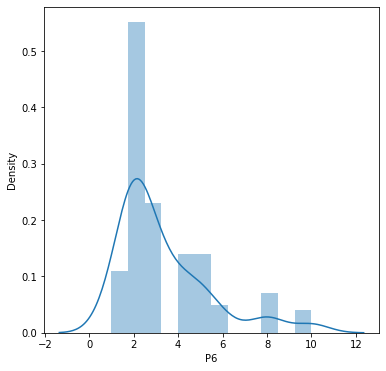

In [7]:
plt.figure(figsize = (6,6))
sns.distplot(df['P6'])
plt.show()

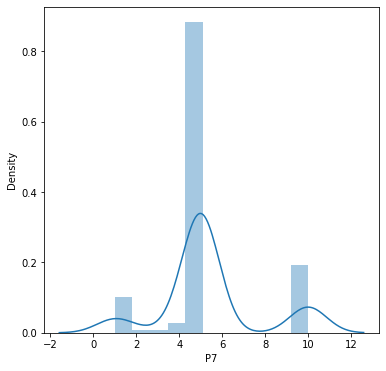

In [8]:
plt.figure(figsize = (6,6))
sns.distplot(df['P7'])
plt.show()

In [9]:
# Since the data was not evenly distributed, I will fill them with median of that particular column
df['P6'].fillna(df['P6'].median(), inplace=True)
df['P7'].fillna(df['P7'].median(), inplace=True)

In [10]:
#Data looks perfect
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [11]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.313869,5.386861,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.049935,2.263028,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


## Checking data for any insights

In [12]:
sns.set()

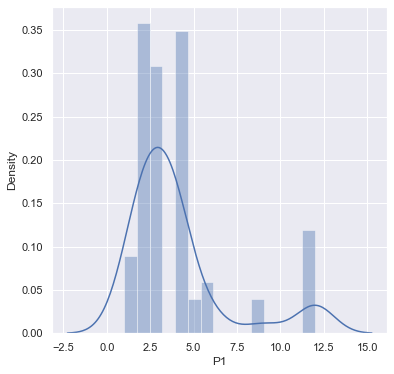

In [13]:
plt.figure(figsize = (6,6))
sns.distplot(df['P1'])
plt.show()

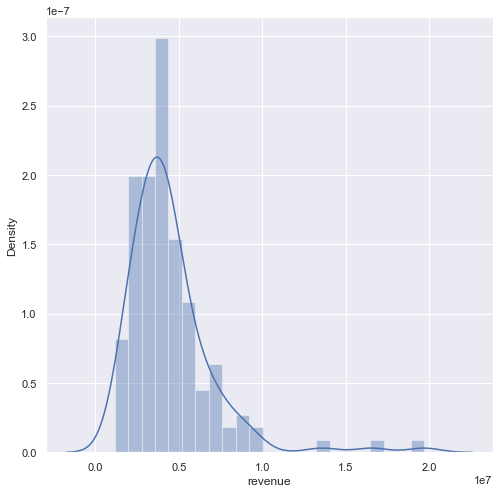

In [14]:
plt.figure(figsize = (8,8))
sns.distplot(df['revenue'])
plt.show()

## Cleaning and Transforming data

In [15]:
df['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

In [16]:
df['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [17]:
encoder = LabelEncoder()

In [18]:
df['City'] = encoder.fit_transform(df['City'])
df['City Group'] = encoder.fit_transform(df['City Group'])
df['Type'] = encoder.fit_transform(df['Type'])

In [19]:
df.drop(columns= ['Open Date','Id'], axis =1, inplace=True)

### Data Models for training and testing

In [20]:
x = df.drop(columns= ['revenue'], axis =1)
y = df['revenue']

In [21]:
x

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,31,0,2,4,5.0,4.0,4.0,2,2.0,5.0,...,2.0,3.0,5,3,4,5,5,4,3,4
1,3,0,1,4,5.0,4.0,4.0,1,2.0,5.0,...,3.0,3.0,0,0,0,0,0,0,0,0
2,10,1,2,2,4.0,2.0,5.0,2,3.0,5.0,...,1.0,3.0,0,0,0,0,0,0,0,0
3,28,1,2,6,4.5,6.0,6.0,4,4.0,10.0,...,2.5,7.5,25,12,10,6,18,12,12,6
4,14,1,2,3,4.0,3.0,4.0,2,2.0,5.0,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,29,1,1,2,3.0,3.0,5.0,4,2.0,4.0,...,2.0,3.0,0,0,0,0,0,0,0,0
133,32,0,1,4,5.0,4.0,4.0,2,3.0,5.0,...,3.0,3.0,0,0,0,0,0,0,0,0
134,18,1,1,3,4.0,4.0,4.0,2,3.0,5.0,...,2.0,3.0,0,0,0,0,0,0,0,0
135,31,0,1,4,5.0,4.0,5.0,2,2.0,5.0,...,3.0,3.0,0,0,0,0,0,0,0,0


In [22]:
y

0      5653753
1      6923131
2      2055379
3      2675511
4      4316715
        ...   
132    5787594
133    9262754
134    2544857
135    7217634
136    6363241
Name: revenue, Length: 137, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 52)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(137, 40) (109, 40) (28, 40)


## Machine Learning Part

In [25]:
regressor = XGBRegressor()

In [26]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
training_data_prediction = regressor.predict(x_train)

In [29]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [30]:
r2_train

0.8567603945466358

In [31]:
test_data_prediction = regressor.predict(x_test)

In [32]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [33]:
r2_test

0.23430501189729136

### Accuracy on training and testing data

In [34]:
print(f"Accuracy on training data: {round(r2_train*100,2)}%")
print(f"Accuracy on test data: {round(r2_test*100,2)}%")

Accuracy on training data: 85.68%
Accuracy on test data: 23.43%
